In [54]:
from web3 import Web3
from datetime import datetime
import pandas as pd
import requests
import json
from IPython.display import Image

In [41]:
infura_url= 'https://mainnet.infura.io/v3/[YOUR KEY]'
web3= Web3(Web3.HTTPProvider (infura_url))
web3.isConnected()

True

In [42]:
sc_address="0x6B175474E89094C44Da98b954EedeAC495271d0F"
with open ("./erc20_abi.json") as f:
    abi= json.load (f)

In [43]:
daiContract = web3.eth.contract(address=sc_address, abi=abi)

In [44]:
daiContract.all_functions()

[<Function DOMAIN_SEPARATOR()>,
 <Function PERMIT_TYPEHASH()>,
 <Function allowance(address,address)>,
 <Function approve(address,uint256)>,
 <Function balanceOf(address)>,
 <Function burn(address,uint256)>,
 <Function decimals()>,
 <Function deny(address)>,
 <Function mint(address,uint256)>,
 <Function move(address,address,uint256)>,
 <Function name()>,
 <Function nonces(address)>,
 <Function permit(address,address,uint256,uint256,bool,uint8,bytes32,bytes32)>,
 <Function pull(address,uint256)>,
 <Function push(address,uint256)>,
 <Function rely(address)>,
 <Function symbol()>,
 <Function totalSupply()>,
 <Function transfer(address,uint256)>,
 <Function transferFrom(address,address,uint256)>,
 <Function version()>,
 <Function wards(address)>]

In [45]:
print ("Name: ", daiContract.functions.name().call())

Name:  Dai Stablecoin


In [46]:
print ("Name: ", daiContract.functions.symbol().call())

Name:  DAI


In [47]:
print ("Decimals: ", daiContract.functions.decimals().call())

Decimals:  18


In [48]:
print ("Max supply is: ", daiContract.functions.totalSupply().call()*10**-18)

Max supply is:  4278529013.713693


In [53]:
print ("Dai holdings: ", daiContract.functions.balanceOf('0x60FaAe176336dAb62e284Fe19B885B095d29fB7F').call()*10**-18)

Dai holdings:  153712896.1329136


### Dune

#### Top 10 holders

WITH transfers AS (
    SELECT
    evt_tx_hash AS tx_hash,
    tr."from" AS address,
    - cast (tr.value as double)/ 1e18 AS amount
     FROM erc20_ethereum.evt_Transfer tr
     WHERE contract_address = 0x6b175474e89094c44da98b954eedeac495271d0f -- DAI
UNION ALL
    SELECT
    evt_tx_hash AS tx_hash,
    tr."to" AS address,
    cast (tr.value as double)/ 1e18 AS amount
    FROM erc20_ethereum.evt_Transfer tr
     WHERE contract_address = 0x6b175474e89094c44da98b954eedeac495271d0f --DAI
)
select address, sum (amount) as balance
from transfers
group by address
order by balance desc
limit 10

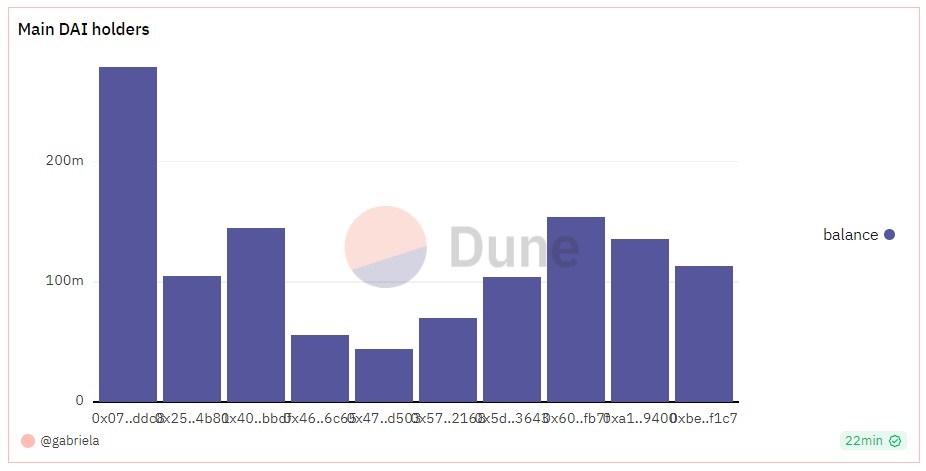

In [57]:
Image(filename='main_dai_holders.jpg') 

#### Total supply

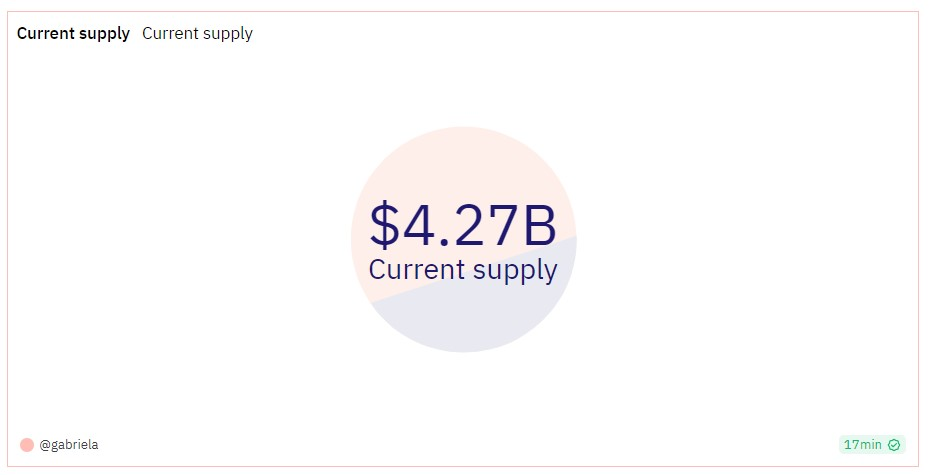

In [58]:
Image(filename='current_supply.jpg') 

#### Transfer volume

SELECT
(sum (cast (tr.value as double)/ 1e18))/1000000000 AS amount
FROM erc20_ethereum.evt_Transfer tr
WHERE   evt_block_time > CURRENT_TIMESTAMP - INTERVAL '7' day
and "contract_address" = 0x6b175474e89094c44da98b954eedeac495271d0f -- DAI

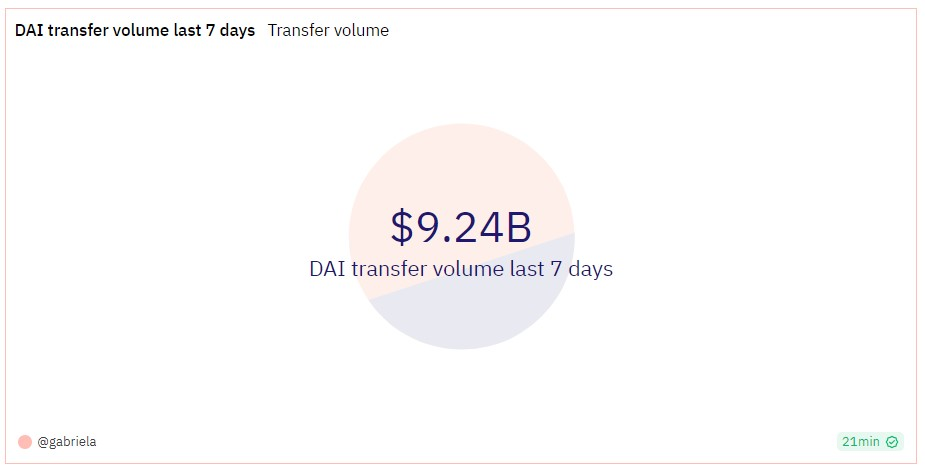

In [59]:
Image(filename='transfer_volume.jpg') 

SELECT date_trunc('day', evt_block_time) as date,
(sum (cast (tr.value as double)/ 1e18)) AS amount
FROM erc20_ethereum.evt_Transfer tr
WHERE date_trunc('day', evt_block_time) > CURRENT_TIMESTAMP - INTERVAL '3' month
AND evt_block_time < date_trunc('day', CURRENT_TIMESTAMP)
and "contract_address" = 0x6b175474e89094c44da98b954eedeac495271d0f -- DAI
GROUP BY 1

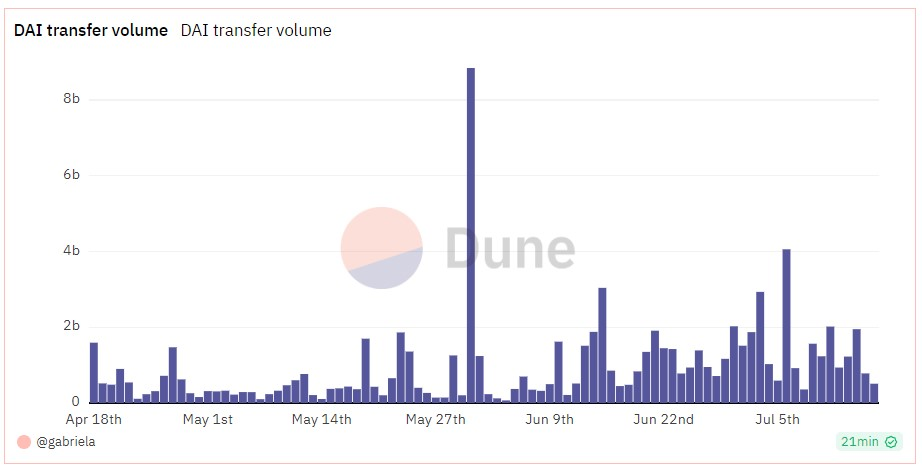

In [60]:
Image(filename='transfer_volume_months.jpg') 